In [1]:
from landlab import imshow_grid
from landlab.io.netcdf import read_netcdf
from landlab.components import FlowAccumulator,ChannelProfiler
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.size"] = 20
matplotlib.rcParams["pdf.fonttype"] = 42

In [2]:
import matplotlib
from landlab.utils import get_watershed_mask
    

Load DEM and plot 

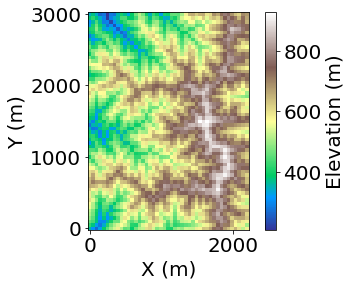

In [3]:
dem_name = 'DEM_Synth.nc' 
grid = read_netcdf(dem_name)
imshow_grid(grid, "topographic__elevation",grid_units=("m", "m"), var_name="Elevation (m)", cmap='terrain')
plt.show()

In order to extract channel networks, the flow connectivity across the grid must already be identified. This is typically done with the FlowAccumulator component. However, this component does not require that the FlowAccumulator was used but it does expect that the following at-node grid fields will be present:'flow__receiver_node' and 'flow__link_to_receiver_node'. 
Here I used the FlowAccumulator to create those for the intance grid. 

More info: https://landlab.readthedocs.io/en/master/reference/components/channel_profiler.html 

In [4]:
fr = FlowAccumulator(grid, flow_director='D8',depression_finder='DepressionFinderAndRouter')
fr.run_one_step()

Extract the largest channel draining to the largest outlet node on <br>
the model grid boundary traced back all the way to the watershed divide.

In [5]:
profiler = ChannelProfiler(grid,number_of_watersheds=1)
profiler.run_one_step()

Get the watershed from teh outlet to the divide 

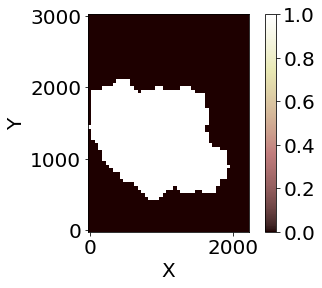

In [6]:
loc=profiler.nodes[0][0]
mask= get_watershed_mask(grid, loc)
# Plot the catchment of the smallest extracted channel
imshow_grid(grid, mask)
plt.show()